features:imd_band, age_band, edu, adjusted_mark

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# load the data
data = pd.read_csv('data/combined-data.csv')

In [ ]:
data.head()
# data.shape

In [3]:
# pre-processing the columns
# change age_band
data["age_band"] = data["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
data["edu"] = data["edu"] .map({"Level or lower":0, "HE or higher":1})

# change imd_band 
data["imd_band"] = data["imd_band"].map({"01/10/2020":'', "0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

In [ ]:
pd.DataFrame(data).to_csv('processed-data.csv')

In [4]:
data.dropna(inplace=True)
data.shape

(18187, 15)

In [ ]:
pd.DataFrame(data).to_csv('dropnull-data.csv')

In [4]:
# extract the four features, 'imd_band', 'age_band', 'edu','adjusted_mark'
X = data.iloc[:, [5, 9, 10, 15]]
# X.shape
X.head()

adjusted_mark imd_band  age_band  edu
0      48.055203        8         3    1
3      64.006980        9         3    1
4      13.803681        2         1    0
5      73.300000        5         1    0
6      90.340760        5         1    0

In [ ]:
# find the optimal value of k
see = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    see.append(kmeans.inertia_)
plt.plot(range(1, 11), see)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
# plt.show()
plt.savefig('image/elbow.png')


In [ ]:
# k value is 3
km=KMeans(n_clusters=3)
print(km)

In [5]:
# preprocessing using min max scaler
#  'imd_band', 'age_band', 'edu','adjusted_mark'

scaler= MinMaxScaler()

scaler.fit(data[['imd_band']])
data['imd_band'] = scaler.transform(data[['imd_band']])

scaler.fit(data[['age_band']])
data['age_band'] = scaler.transform(data[['age_band']])

scaler.fit(data[['edu']])
data['edu'] = scaler.transform(data[['edu']])

scaler.fit(data[['adjusted_mark']])
data['adjusted_mark'] = scaler.transform(data[['adjusted_mark']])

In [ ]:
pd.DataFrame(data).to_csv('minmaxscaled-data.csv')

/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_1416/1228811188.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=data['adjusted_mark'],y=data['imd_band'],cmap="copper", label='the Index of Multiple Deprivation')
/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_1416/1228811188.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=data['adjusted_mark'],y= data['age_band'],cmap="copper", label='Age')
/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_1416/1228811188.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=data['adjusted_mark'],y= data['edu'],cmap="copper", label='Previous Education')


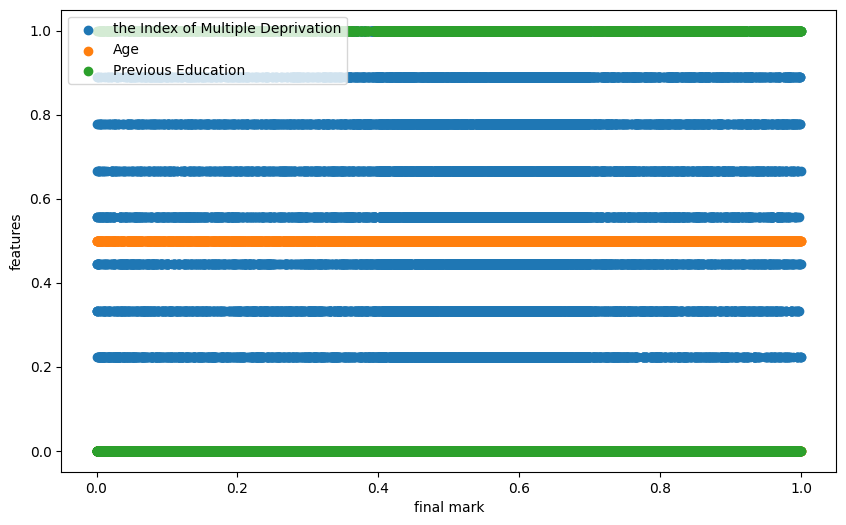

In [7]:
# create a scatter plot with multiple x variables

plt.figure(figsize=(10,6))
plt.scatter(x=data['adjusted_mark'],y=data['imd_band'],cmap="copper", label='the Index of Multiple Deprivation')
plt.scatter(x=data['adjusted_mark'],y= data['age_band'],cmap="copper", label='Age')
plt.scatter(x=data['adjusted_mark'],y= data['edu'],cmap="copper", label='Previous Education')
plt.legend()
plt.xlabel('final mark')
plt.ylabel('features')
plt.show()

In [5]:
# extract the four features, 'imd_band', 'age_band', 'edu','adjusted_mark'
predict_data = data.iloc[:, [5, 9, 10, 15]]
# predict_data = data[['imd_band']]
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(predict_data)
y_predicted

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 0, 0, 2], dtype=int32)

In [6]:
data['cluster'] = y_predicted
data.head()

Unnamed: 0  id_student code_module code_presentation  attempted_weight   
0           0        6516         AAA             2014J             100.0  \
3           3       11391         AAA             2013J             100.0   
4           4       23629         BBB             2013B              25.0   
5           5       23698         CCC             2014J             150.0   
6           6       23798         BBB             2013J             100.0   

   adjusted_mark  mark gender               region  imd_band  age_band   
0       0.480552  31.8      M             Scotland  0.888889       1.0  \
3       0.640070  41.2      M  East Anglian Region  1.000000       1.0   
4       0.138037   8.3      F  East Anglian Region  0.222222       0.0   
5       0.733000  55.0      F  East Anglian Region  0.555556       0.0   
6       0.903408  44.6      M                Wales  0.555556       0.0   

   num_of_prev_attempts  studied_credits disability final_result  edu  cluster  
0                     0               60          N         Pass  1.0        2  
3                     0              240          N         Pass  1.0        2  
4                     2               60          N         Fail  0.0        1  
5                     0              120          N  Distinction  0.0        0  
6                     0               60          N  Distinction  0.0        0

In [7]:
pd.DataFrame(data).to_csv('clustered-data.csv')

In [8]:
km.cluster_centers_

array([[ 5.58427466e-01,  7.73094040e-01,  1.51739987e-01,
        -5.27355937e-16],
       [ 4.69706236e-01,  2.68154617e-01,  1.29548763e-01,
        -5.82867088e-16],
       [ 5.91681569e-01,  5.91818684e-01,  2.53399668e-01,
         1.00000000e+00]])

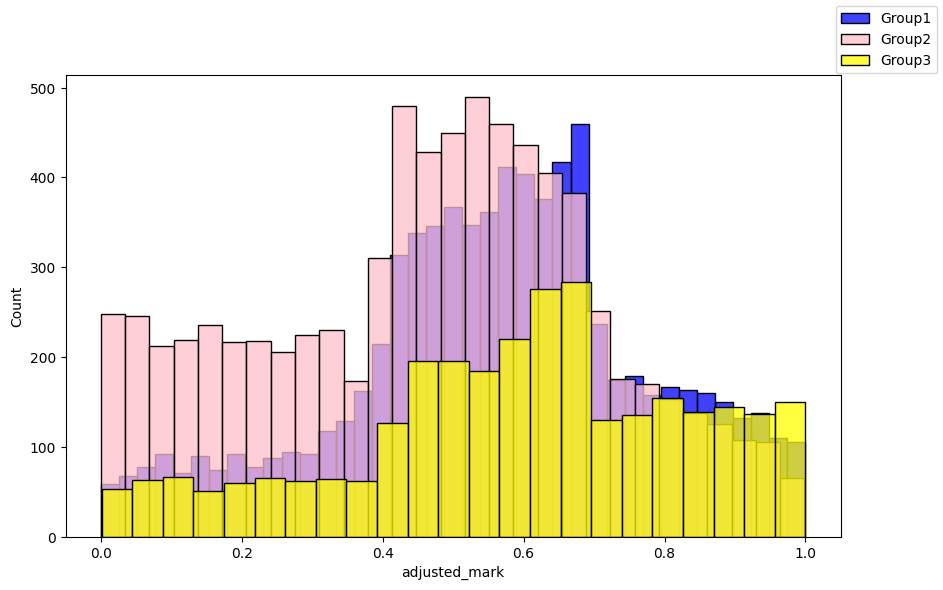

In [10]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
fig = plt.figure(figsize=(10,6))
sns.histplot(df1.adjusted_mark, color='blue')
sns.histplot(df2.adjusted_mark, color='pink')
sns.histplot(df3.adjusted_mark, color='yellow')

fig.legend(labels=['Group1','Group2','Group3'])
# plt.show()
plt.savefig('image/groupclustering.png')

In [14]:
# dividing data to train and test
train_data, test_data = np.split(data.sample(frac=1, random_state=1729), [int(0.8 * len(data))])
print(train_data.shape, test_data.shape)

(14549, 17) (3638, 17)


In [15]:
# write to csv file with combined tables
pd.DataFrame(train_data).to_csv('oulad_train.csv')
pd.DataFrame(test_data).to_csv('oulad_test.csv')

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [5]:
train_data = pd.read_csv('oulad_train.csv')

In [6]:
#preprocessing train data for Apriori
# 'imd_band'>=0.5 is 1 otherwise 0, means IMD>=50% is 1, 'age_band'>=0.5 is 1 otherwise 0 means >=35 is 1, 
def encode_units(x):
    if x >=0.5:
        return 1
    else:
        return 0
# 'adjusted_mark'>=0.4 is 1 means pass, otherwise 0
def encode_units_2(x):
    if x >=0.4:
        return 1
    else:
        return 0

train_data['imd_band'] = train_data['imd_band'].map(encode_units)
train_data['age_band'] = train_data['age_band'].map(encode_units)
train_data['adjusted_mark'] = train_data['adjusted_mark'].map(encode_units_2)
train_data['edu'] = train_data['edu'].map(encode_units)

train_data[['imd_band', 'age_band', 'edu','adjusted_mark']]


imd_band  age_band  edu  adjusted_mark
0             0         0    0              1
1             1         1    0              1
2             0         0    1              1
3             1         1    0              0
4             1         0    0              1
...         ...       ...  ...            ...
14544         0         1    0              1
14545         0         0    1              1
14546         1         0    0              0
14547         0         0    1              1
14548         0         0    0              0

[14549 rows x 4 columns]

In [7]:
# after dividing train_data to 3 groups using Apriori to find frequent itemset
# Apriori: if A happen, the chance of result B happen
# Apply Apriori on each cluster separately
train_df1 = train_data[train_data.cluster==0]
train_df2 = train_data[train_data.cluster==1]
train_df3 = train_data[train_data.cluster==2]

In [100]:
train_df3 = train_data[train_data.cluster==2]

In [101]:
train_df3.shape

(2402, 18)

In [20]:
# Define Apriori parameters
min_support = 0.03
# max_len = 2

# Run Apriori on the first cluster
freq_items1 = apriori(train_df1[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 1 is: ")
freq_items1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support              itemsets  length
0  0.996205            (imd_band)       1
1  0.296981            (age_band)       1
2  0.293846  (imd_band, age_band)       2

In [9]:
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [10]:
# Run Apriori on the second cluster
freq_items2 = apriori(train_df2[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items2['length'] = freq_items2['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 2 is: ")
freq_items2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support         itemsets  length
0  0.666776  (adjusted_mark)       1

In [11]:
rules2 = association_rules(freq_items2, metric="lift", min_threshold=1)
print("rule 2 is :")
rules2

rule 2 is :


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

In [12]:
freq_items3 = apriori(train_df3[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items3['length'] = freq_items3['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 3 is: ")
freq_items3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                        itemsets  length
0   0.594921                      (imd_band)       1
1   0.468360                      (age_band)       1
2   1.000000                           (edu)       1
3   0.818068                 (adjusted_mark)       1
4   0.594921                 (imd_band, edu)       2
5   0.503331       (imd_band, adjusted_mark)       2
6   0.468360                 (edu, age_band)       2
7   0.385928       (adjusted_mark, age_band)       2
8   0.818068            (edu, adjusted_mark)       2
9   0.503331  (imd_band, edu, adjusted_mark)       3
10  0.385928  (adjusted_mark, edu, age_band)       3

In [13]:
rules3 = association_rules(freq_items3, metric="lift", min_threshold=1)
rules3

antecedents                consequents  antecedent support   
0                  (imd_band)                      (edu)            0.594921  \
1                       (edu)                 (imd_band)            1.000000   
2                  (imd_band)            (adjusted_mark)            0.594921   
3             (adjusted_mark)                 (imd_band)            0.818068   
4                       (edu)                 (age_band)            1.000000   
5                  (age_band)                      (edu)            0.468360   
6             (adjusted_mark)                 (age_band)            0.818068   
7                  (age_band)            (adjusted_mark)            0.468360   
8                       (edu)            (adjusted_mark)            1.000000   
9             (adjusted_mark)                      (edu)            0.818068   
10            (imd_band, edu)            (adjusted_mark)            0.594921   
11  (imd_band, adjusted_mark)                      (edu)            0.503331   
12       (edu, adjusted_mark)                 (imd_band)            0.818068   
13                 (imd_band)       (edu, adjusted_mark)            0.594921   
14                      (edu)  (imd_band, adjusted_mark)            1.000000   
15            (adjusted_mark)            (imd_band, edu)            0.818068   
16       (edu, adjusted_mark)                 (age_band)            0.818068   
17  (adjusted_mark, age_band)                      (edu)            0.385928   
18            (edu, age_band)            (adjusted_mark)            0.468360   
19            (adjusted_mark)            (edu, age_band)            0.818068   
20                      (edu)  (adjusted_mark, age_band)            1.000000   
21                 (age_band)       (edu, adjusted_mark)            0.468360   

    consequent support   support  confidence      lift  leverage  conviction   
0             1.000000  0.594921    1.000000  1.000000  0.000000         inf  \
1             0.594921  0.594921    0.594921  1.000000  0.000000    1.000000   
2             0.818068  0.503331    0.846046  1.034200  0.016645    1.181729   
3             0.594921  0.503331    0.615267  1.034200  0.016645    1.052884   
4             0.468360  0.468360    0.468360  1.000000  0.000000    1.000000   
5             1.000000  0.468360    1.000000  1.000000  0.000000         inf   
6             0.468360  0.385928    0.471756  1.007251  0.002778    1.006429   
7             0.818068  0.385928    0.824000  1.007251  0.002778    1.033703   
8             0.818068  0.818068    0.818068  1.000000  0.000000    1.000000   
9             1.000000  0.818068    1.000000  1.000000  0.000000         inf   
10            0.818068  0.503331    0.846046  1.034200  0.016645    1.181729   
11            1.000000  0.503331    1.000000  1.000000  0.000000         inf   
12            0.594921  0.503331    0.615267  1.034200  0.016645    1.052884   
13            0.818068  0.503331    0.846046  1.034200  0.016645    1.181729   
14            0.503331  0.503331    0.503331  1.000000  0.000000    1.000000   
15            0.594921  0.503331    0.615267  1.034200  0.016645    1.052884   
16            0.468360  0.385928    0.471756  1.007251  0.002778    1.006429   
17            1.000000  0.385928    1.000000  1.000000  0.000000         inf   
18            0.818068  0.385928    0.824000  1.007251  0.002778    1.033703   
19            0.468360  0.385928    0.471756  1.007251  0.002778    1.006429   
20            0.385928  0.385928    0.385928  1.000000  0.000000    1.000000   
21            0.818068  0.385928    0.824000  1.007251  0.002778    1.033703   

    zhangs_metric  
0        0.000000  
1        0.000000  
2        0.081636  
3        0.181766  
4        0.000000  
5        0.000000  
6        0.039568  
7        0.013541  
8        0.000000  
9        0.000000  
10       0.081636  
11       0.000000  
12       0.181766  
13       0.081636  
14       0.000000  
15       0.18176

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# load the data
test_data = pd.read_csv('oulad_test.csv')

In [70]:
#preprocessing test data for Apriori
# 'imd_band'>=0.5 is 1 otherwise 0, means IMD>=50% is 1, 'age_band'>=0.5 is 1 otherwise 0 means >=35 is 1, 
def encode_units(x):
    if x >=0.5:
        return 1
    else:
        return 0
# 'adjusted_mark'>=0.4 is 1 means pass, otherwise 0
def encode_units_2(x):
    if x >=0.4:
        return 1
    else:
        return 0

test_data['imd_band'] = test_data['imd_band'].map(encode_units)
test_data['age_band'] = test_data['age_band'].map(encode_units)
test_data['adjusted_mark'] = test_data['adjusted_mark'].map(encode_units_2)
test_data['edu'] = test_data['edu'].map(encode_units)

new_data = test_data[['imd_band', 'age_band', 'edu','cluster']]
new_data

imd_band  age_band  edu  cluster
0            0         1    0        1
1            1         0    0        0
2            0         0    0        1
3            0         0    0        1
4            0         0    0        1
...        ...       ...  ...      ...
3633         1         0    0        1
3634         1         0    0        0
3635         0         0    0        1
3636         0         1    0        1
3637         1         0    0        0

[3638 rows x 4 columns]

In [19]:
test_data[test_data['cluster']==2]

Unnamed: 0.1  Unnamed: 0  id_student code_module code_presentation   
5            15724       15724      610234         CCC             2014J  \
19           11531       11531      576600         BBB             2013J   
22           25453       25453     2613219         EEE             2014B   
24           19870       19870      648244         FFF             2014J   
37           15899       15899      611402         EEE             2013J   
...            ...         ...         ...         ...               ...   
3611         18823       18823      634111         FFF             2014B   
3612          2171        2171      283133         EEE             2013J   
3613         21411       21411      680894         EEE             2014J   
3615         22274       22274      690016         EEE             2014J   
3617          4770        4770      441385         EEE             2014J   

      attempted_weight  adjusted_mark  mark gender                region   
5                150.0              1  64.8      M              Scotland  \
19               100.0              1  34.6      F         London Region   
22               100.0              0  33.1      M              Scotland   
24                25.0              0   7.2      F                 Wales   
37               100.0              1  44.8      M          South Region   
...                ...            ...   ...    ...                   ...   
3611             100.0              1  47.4      M     South East Region   
3612             100.0              1  46.5      M  East Midlands Region   
3613             100.0              1  37.2      M              Scotland   
3615             100.0              1  43.2      M      Yorkshire Region   
3617              72.0              0  30.0      M              Scotland   

      imd_band  age_band  num_of_prev_attempts  studied_credits disability   
5            1         0                     1               60          N  \
19           0         1                     0               60          N   
22           1         1                     0               30          N   
24           0         0                     0              120          N   
37           1         1                     0               60          N   
...        ...       ...                   ...              ...        ...   
3611         1         0                     0               60          N   
3612         1         0                     0              120          N   
3613         0         0                     0               30          N   
3615         1         0                     0               60          N   
3617         1         1                     0               90          N   

     final_result  edu  cluster  
5     Distinction    1        2  
19           Pass    1        2  
22           Fail    1        2  
24           Fail    1        2  
37           Pass    1        2  
...           ...  ...      ...  
3611         Pass    1        2  
3612  Distinction    1        2  
3613         Pass    1        2  
3615         Pass    1        2  
3617         Fail    1        2  

[613 rows x 18 columns]

In [40]:
onerow = test_data.iloc[0,:]
onerow

Unnamed: 0.1                          10130
Unnamed: 0                            10130
id_student                           560643
code_module                             GGG
code_presentation                     2014J
attempted_weight                       33.3
adjusted_mark                             0
mark                                    8.3
gender                                    F
region                  East Anglian Region
imd_band                                  0
age_band                                  1
num_of_prev_attempts                      0
studied_credits                          30
disability                                Y
final_result                           Fail
edu                                       0
cluster                                   1
Name: 0, dtype: object

In [45]:
itemset=set()
if onerow['imd_band'] == 1:
    itemset.add('imd_band')
if onerow['age_band'] == 1:
    itemset.add('age_band')
if onerow['edu'] == 1:
    itemset.add('edu')

itemset

{'age_band'}

In [71]:
test_group3=test_data[test_data.cluster==2]
test_group3

Unnamed: 0.1  Unnamed: 0  id_student code_module code_presentation   
5            15724       15724      610234         CCC             2014J  \
19           11531       11531      576600         BBB             2013J   
22           25453       25453     2613219         EEE             2014B   
24           19870       19870      648244         FFF             2014J   
37           15899       15899      611402         EEE             2013J   
...            ...         ...         ...         ...               ...   
3611         18823       18823      634111         FFF             2014B   
3612          2171        2171      283133         EEE             2013J   
3613         21411       21411      680894         EEE             2014J   
3615         22274       22274      690016         EEE             2014J   
3617          4770        4770      441385         EEE             2014J   

      attempted_weight  adjusted_mark  mark gender                region   
5                150.0              1  64.8      M              Scotland  \
19               100.0              1  34.6      F         London Region   
22               100.0              0  33.1      M              Scotland   
24                25.0              0   7.2      F                 Wales   
37               100.0              1  44.8      M          South Region   
...                ...            ...   ...    ...                   ...   
3611             100.0              1  47.4      M     South East Region   
3612             100.0              1  46.5      M  East Midlands Region   
3613             100.0              1  37.2      M              Scotland   
3615             100.0              1  43.2      M      Yorkshire Region   
3617              72.0              0  30.0      M              Scotland   

      imd_band  age_band  num_of_prev_attempts  studied_credits disability   
5            1         0                     1               60          N  \
19           0         1                     0               60          N   
22           1         1                     0               30          N   
24           0         0                     0              120          N   
37           1         1                     0               60          N   
...        ...       ...                   ...              ...        ...   
3611         1         0                     0               60          N   
3612         1         0                     0              120          N   
3613         0         0                     0               30          N   
3615         1         0                     0               60          N   
3617         1         1                     0               90          N   

     final_result  edu  cluster  
5     Distinction    1        2  
19           Pass    1        2  
22           Fail    1        2  
24           Fail    1        2  
37           Pass    1        2  
...           ...  ...      ...  
3611         Pass    1        2  
3612  Distinction    1        2  
3613         Pass    1        2  
3615         Pass    1        2  
3617         Fail    1        2  

[613 rows x 18 columns]

In [93]:
def get_itemset(onerowdata):
    itemset=set()
    if onerowdata['imd_band'] == 1:
        itemset.add('imd_band')
    if onerowdata['age_band'] == 1:
        itemset.add('age_band')
    if onerowdata['edu'] == 1:
        itemset.add('edu')
    return itemset

def get_result(itemset):
    new_data=itemset
    # Apply the association rules to the new data
    for _, rule in rules3.iterrows():
        antecedent = set(rule['antecedents'])
        consequent = set(rule['consequents'])
        confidence = rule['confidence']
        support=rule['support']
        
        if len(antecedent) == len(new_data):
            if (support>=0.5) and (antecedent==new_data) and ('adjusted_mark' in consequent) and (confidence>=0.5):
                print(f"Instance {new_data} predicts {consequent} confidence is {confidence}")
                return 1
    return 0

aprioriLst=[]
for index, row in test_group3.iterrows():
    # print(index,row)
    itemset=get_itemset(row)
    result = get_result(itemset)
    test_group3.loc[index,'apriori']=result
    
test_group3
    

Instance {'imd_band', 'edu'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'imd_band', 'edu'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'imd_band', 'edu'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'imd_band', 'edu'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'edu'} predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance {'imd_band', 'edu'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'imd_band', 'edu'} predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance {'imd_band', 'edu'} predicts {'adjusted_mark'} confidence is 0.846046186

Unnamed: 0.1  Unnamed: 0  id_student code_module code_presentation   
5            15724       15724      610234         CCC             2014J  \
19           11531       11531      576600         BBB             2013J   
22           25453       25453     2613219         EEE             2014B   
24           19870       19870      648244         FFF             2014J   
37           15899       15899      611402         EEE             2013J   
...            ...         ...         ...         ...               ...   
3611         18823       18823      634111         FFF             2014B   
3612          2171        2171      283133         EEE             2013J   
3613         21411       21411      680894         EEE             2014J   
3615         22274       22274      690016         EEE             2014J   
3617          4770        4770      441385         EEE             2014J   

      attempted_weight  adjusted_mark  mark gender                region   
5                150.0              1  64.8      M              Scotland  \
19               100.0              1  34.6      F         London Region   
22               100.0              0  33.1      M              Scotland   
24                25.0              0   7.2      F                 Wales   
37               100.0              1  44.8      M          South Region   
...                ...            ...   ...    ...                   ...   
3611             100.0              1  47.4      M     South East Region   
3612             100.0              1  46.5      M  East Midlands Region   
3613             100.0              1  37.2      M              Scotland   
3615             100.0              1  43.2      M      Yorkshire Region   
3617              72.0              0  30.0      M              Scotland   

      imd_band  age_band  num_of_prev_attempts  studied_credits disability   
5            1         0                     1               60          N  \
19           0         1                     0               60          N   
22           1         1                     0               30          N   
24           0         0                     0              120          N   
37           1         1                     0               60          N   
...        ...       ...                   ...              ...        ...   
3611         1         0                     0               60          N   
3612         1         0                     0              120          N   
3613         0         0                     0               30          N   
3615         1         0                     0               60          N   
3617         1         1                     0               90          N   

     final_result  edu  cluster  apriori  
5     Distinction    1        2        1  
19           Pass    1        2        0  
22           Fail    1        2        0  
24           Fail    1        2        1  
37           Pass    1        2        0  
...           ...  ...      ...      ...  
3611         Pass    1        2        1  
3612  Distinction    1        2        1  
3613         Pass    1        2        1  
3615         Pass    1        2        1  
3617         Fail    1        2        0  

[613 rows x 19 columns]

In [97]:
joined=pd.merge(test_data,test_group3,on=['id_student',	'code_module','code_presentation'],how='left', suffixes=('', '_y'))
joined

Unnamed: 0.1  Unnamed: 0  id_student code_module code_presentation   
0            10130       10130      560643         GGG             2014J  \
1             1752        1752      245217         CCC             2014J   
2             2856        2856      336213         DDD             2014J   
3            11323       11323      574819         DDD             2013J   
4            21485       21485      681746         DDD             2014J   
...            ...         ...         ...         ...               ...   
3633         19025       19025      635124         FFF             2014B   
3634         16538       16538      618338         GGG             2014B   
3635          1794        1794      248994         DDD             2013B   
3636          4496        4496      425332         FFF             2014B   
3637          2380        2380      298476         BBB             2013B   

      attempted_weight  adjusted_mark  mark gender                region  ...   
0                 33.3              0   8.3      F   East Anglian Region  ...  \
1                120.0              0  30.1      M  East Midlands Region  ...   
2                200.0              1  65.0      M                 Wales  ...   
3                200.0              1  52.6      F     South West Region  ...   
4                200.0              1  74.0      F     South East Region  ...   
...                ...            ...   ...    ...                   ...  ...   
3633              25.0              0   8.1      M     South East Region  ...   
3634             100.0              1  35.8      M         London Region  ...   
3635             200.0              1  83.9      F                 Wales  ...   
3636              25.0              0  11.5      M     South East Region  ...   
3637             100.0              1  35.3      F          North Region  ...   

      region_y  imd_band_y  age_band_y  num_of_prev_attempts_y   
0          NaN         NaN         NaN                     NaN  \
1          NaN         NaN         NaN                     NaN   
2          NaN         NaN         NaN                     NaN   
3          NaN         NaN         NaN                     NaN   
4          NaN         NaN         NaN                     NaN   
...        ...         ...         ...                     ...   
3633       NaN         NaN         NaN                     NaN   
3634       NaN         NaN         NaN                     NaN   
3635       NaN         NaN         NaN                     NaN   
3636       NaN         NaN         NaN                     NaN   
3637       NaN         NaN         NaN                     NaN   

     studied_credits_y disability_y  final_result_y  edu_y  cluster_y  apriori  
0                  NaN          NaN             NaN    NaN        NaN      NaN  
1                  NaN          NaN             NaN    NaN        NaN      NaN  
2                  NaN          NaN             NaN    NaN        NaN      NaN  
3                  NaN          NaN             NaN    NaN        NaN      NaN  
4                  NaN          NaN             NaN    NaN        NaN      NaN  
...                ...          ...             ...    ...        ...      ...  
3633               NaN          NaN             NaN    NaN        NaN      NaN  
3634               NaN          NaN             NaN    NaN        NaN      NaN  
3635               NaN          NaN             NaN    NaN        NaN      NaN  
3636               NaN          NaN             NaN    NaN        NaN      NaN  
3637               NaN          NaN             NaN    NaN        NaN      NaN  

[3638 rows x 34 columns]

In [98]:
joined.drop(joined.filter(regex='_y$').columns, axis=1, inplace=True)

In [99]:
pd.DataFrame(joined).to_csv('joined.csv')

In [78]:

freq_items4 = apriori(test_group3[['imd_band', 'age_band', 'edu']], min_support=min_support, use_colnames=True)

# print("frequent itemset 3 is: ")
freq_items4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                   itemsets
0  0.628059                 (imd_band)
1  0.492659                 (age_band)
2  1.000000                      (edu)
3  0.316476       (imd_band, age_band)
4  0.628059            (imd_band, edu)
5  0.492659            (edu, age_band)
6  0.316476  (imd_band, edu, age_band)

In [52]:
# Loop through each cluster and each data point to apply the rules
# test data 

new_data = freq_items4['itemsets']
# new_data=itemset
# Apply the association rules to the new data
for i, rule in rules3.iterrows():
    antecedent = set(rule['antecedents'])
    consequent = set(rule['consequents'])
    confidence = rule['confidence']
    # Check if the antecedent of the rule holds for each instance of new data
    for instance in new_data:
        if antecedent.issubset(set(instance)):
            if 'adjusted_mark' in consequent :
                # If the antecedent holds, predict the consequent with probability given by the rule's confidence
                print(f"Instance {instance} predicts {consequent} confidence is {confidence}")

0
1
2
Instance frozenset({'imd_band'}) predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance frozenset({'imd_band', 'age_band'}) predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance frozenset({'imd_band', 'edu'}) predicts {'adjusted_mark'} confidence is 0.8460461861441566
Instance frozenset({'imd_band', 'edu', 'age_band'}) predicts {'adjusted_mark'} confidence is 0.8460461861441566
3
4
5
6
7
Instance frozenset({'age_band'}) predicts {'adjusted_mark'} confidence is 0.8240000000000001
Instance frozenset({'imd_band', 'age_band'}) predicts {'adjusted_mark'} confidence is 0.8240000000000001
Instance frozenset({'edu', 'age_band'}) predicts {'adjusted_mark'} confidence is 0.8240000000000001
Instance frozenset({'imd_band', 'edu', 'age_band'}) predicts {'adjusted_mark'} confidence is 0.8240000000000001
8
Instance frozenset({'edu'}) predicts {'adjusted_mark'} confidence is 0.8180682764363031
Instance frozenset({'imd_band', 'edu'}) predicts {'adjusted_mark'} confide

In [ ]:

# Define Apriori parameters
min_support = 0.3
# max_len = 2

# Run Apriori on the first cluster
freq_items1 = apriori(train_df1[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 1 is: ")
# freq_items1
# Generate association rules for the first cluster
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
print("rule 1 is :")
rules1
# Run Apriori on the second cluster
freq_items2 = apriori(train_df2[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items2['length'] = freq_items2['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 2 is: ")
# freq_items2
# Generate association rules for the second cluster
rules2 = association_rules(freq_items2, metric="lift", min_threshold=1)
print("rule 2 is :")
rules2
# Run Apriori on the third cluster
freq_items3 = apriori(train_df3[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items3['length'] = freq_items3['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 3 is: ")
# freq_items3
# Generate association rules for the third cluster
rules3 = association_rules(freq_items3, metric="lift", min_threshold=1)
print("rule 3 is :")
rules3

<Axes: >

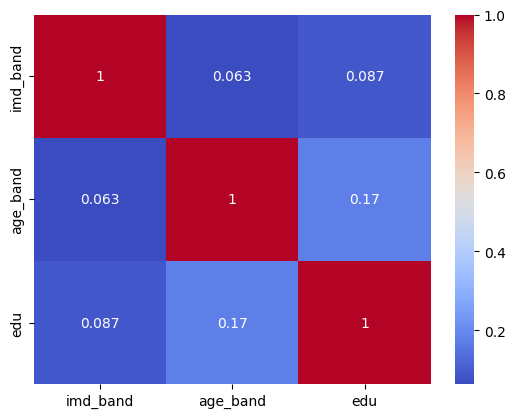

In [13]:
# create correlation matrix
columns=['imd_band', 'age_band', 'edu','adjusted_mark']
corr_matrix = data[columns].corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')